# 문제 1


**정답**

3, 4

**풀이**

1. 결정 트리에서 정보 이득이 클수록 분류가 잘 된다. 정보 이득은 노드를 순수하게 나눌 수록 정보 이득이 커진다. 즉, 불순도의 값이 작을 수록 분류가 잘 된다. 따라서 엔트로피 불순도가 낮을수록 분류하기가 좋기 때문에 3번은 틀렸다. 
2. 특성 중요도와 노드는 서로 직접적인 연관이 없다. 특성 중요도의 값이 높을 수록 해당 특성이 분류에 있어 중요한 요소인 것으로 볼 수는 있지만, 특성 값이 높다고 노드가 중요한 분류 기준이라고 할 수는 없다

# 문제 2
**정답**

1, 3, 4

**풀이**

1. 복원추출로 얻은 샘플은 모집단 추론 시 편향(bias)를 발생할 수도 있다. 따라서 bootstrap은 모집단을 추정 가능하게 한다고 보기 어렵다.
2. 앙상블 학습은 정형 데이터에서 높은 성능을 다룬다. Histogram-based Gradient Boosting은 앙상블 학습의 하나이기 때문에 정형 데이터에서 높은 성능을 다룬다. 따라서 맞는 선택지이다.
3. 엑스트라 트리는 랜덤 포레스트보다 랜덤성이 크기 때문에 더 많은 결정 트리를 훈련헤야 한다. 하지만 랜덤하게 노드를 분할하기 때문에 계산 속도가 빠르다. 따라서 랜덤성이 클수록 계산 속도가 느리다고 할 수 없다.
4. random forest는 오버피팅을 피하기 위해 사용하는 모델이다. 학습한 모델에서 각 트리가 오버피팅이 될순 있다. 하지만 트리의 연관성이 낮아야 오버피팅을 피할 수 있기 때문에 트리의 연관성이 낮을수록 random forest의 성능이 높아진다.

약한 학습자는 앙상블 학습에서 사용하는 여로 모델 중 각 모델을 약한 학습자라고 하는 것 같다.

# 문제 3

In [ ]:
import pandas as pd
import numpy as np

fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

#data split
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

#preprocessing
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#LR
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print("적용전")
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

#************************ GridSearchCV **************************
from sklearn.model_selection import GridSearchCV

# 탐색할 매개변수
params = {'C': range(1, 100)}

gs = GridSearchCV(LogisticRegression(max_iter=1000), params, n_jobs=-1)
gs.fit(train_scaled, train_target)

dt = gs.best_estimator_
print("\n적용후")
print(gs.score(train_scaled, train_target))
print(gs.score(test_scaled, test_target))

print(gs.best_params_)

적용전
0.9327731092436975
0.925


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,



적용후
0.9831932773109243
0.925
{'C': 97}


# 문제 4

**정답**

2, 3, 6

**풀이**

1. 어떤 특정한 하이퍼파라미터의 최적값은 다른 하이퍼파라미터 값에 따라 변하게 된다. 따라서 각각의 하이퍼파라미터는 종속적으로 모델의 성능에 영향을 미친다.
2. Leave One Out Cross Validation은 많은 수의 model을 만들고 test해야하기 때문에 연산시간이 굉장히 오래 걸린다. 하지만 Linear regression 또는 polynomial regression에서는 연산시간을 획기적으로 단축할 수 있다.

1. LOOCV는 모든 특성을 validation으로 사용하기 때문에 variance가 높다.

LOOCV의 특징

- 개념
: 데이터셋에서 하나의 튜플(tuple)만 test에 사용하고 나머지는 모두 train에 사용하는 방법이다. 단 이 방법을 모든 데이터셋에 대해 적용한다.
- 연산시간이 많이 걸린다. 따라서 데이터가 크거나, 연산이 오래걸리는 작업을 할 때 지양하는 것이 좋다.
- 모델의 신뢰성이 높고, bias(편향)이 일어날 가능성이 낮다

# 문제 5

In [ ]:
from sklearn import datasets
import pandas as pd
import seaborn as sns

planets = sns.load_dataset('planets')

# 랜덤서치를 이용하여 

In [ ]:
#planets=sns.load_dataset('planets')
planets.info()

# method가 target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
# 평균값으로 결측값을 채워보자
value = planets.mean(axis=0, numeric_only=True)
planets.fillna(value=value, inplace=True)
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  1035 non-null   float64
 3   mass            1035 non-null   float64
 4   distance        1035 non-null   float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
# 훈련데이터 테스트데이터 만들기
#data split
from sklearn.model_selection import train_test_split

planet_input = planets[['number', 'orbital_period', 'mass', 'distance', 'year']].to_numpy()
planet_target = planets['method'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(
    planet_input, planet_target, random_state=42)

In [ ]:
from scipy.stats import uniform, randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(2, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25)}

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)


dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.990979381443299
0.9343629343629344


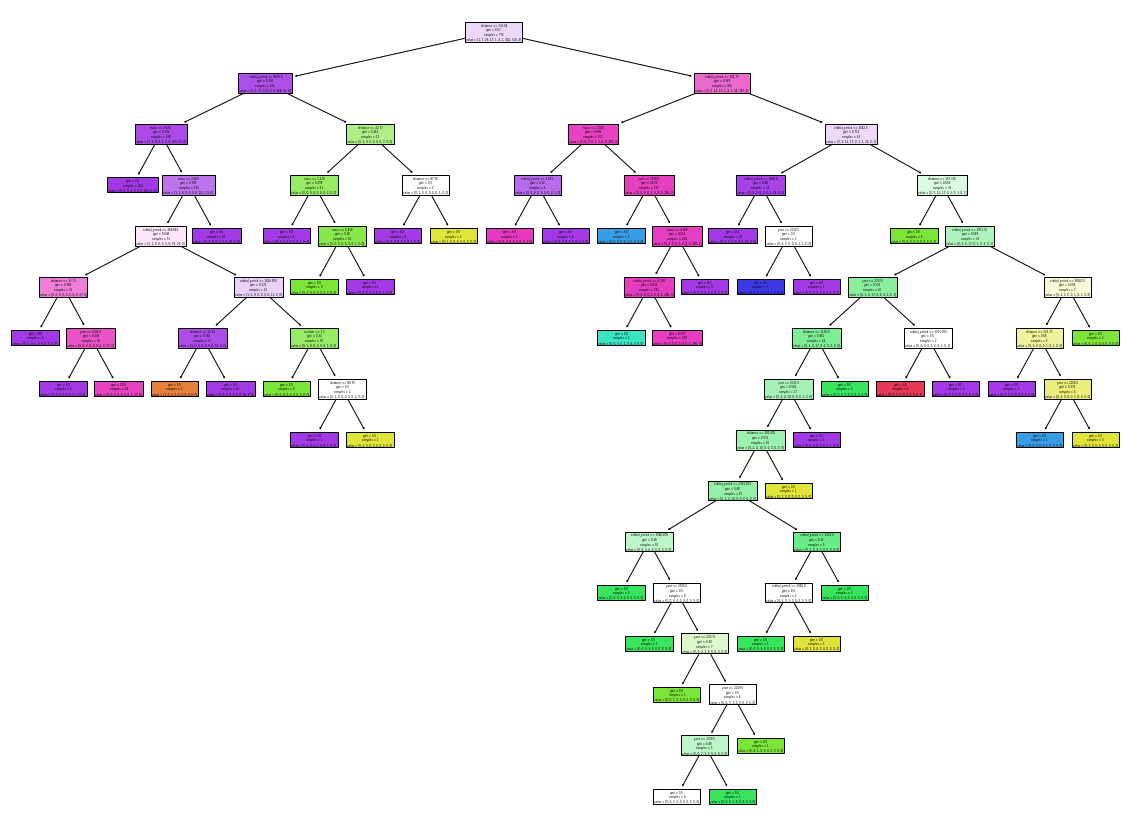

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['number', 'orbital_period', 'mass', 'distance', 'year'])
plt.show()